In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# wt : 989, 311
binnedDataWt=['/Users/johnmarshall/Documents/Analysis/miniscope_analysis/miniscopeLinearTrack/firingRateAnalysis/01_2025_m989/m989_binnedFiringRate.csv', 
              '/Users/johnmarshall/Documents/Analysis/miniscope_analysis/miniscopeLinearTrack/firingRateAnalysis/04_2025_m311/m311_binnedFiringRate.csv']
# ko : m328 ( m388? ) 
binnedDataKO=[
'/Users/johnmarshall/Documents/Analysis/miniscope_analysis/miniscopeLinearTrack/firingRateAnalysis/04_2025_m328/m328_binnedFiringRate.csv',
'/Users/johnmarshall/Documents/Analysis/miniscope_analysis/miniscopeLinearTrack/firingRateAnalysis/07_2025_m388/m388_binnedFiringRate.csv']

In [3]:
# load each into a DataFrame
wt_dfs = [pd.read_csv(fp) for fp in binnedDataWt]
ko_dfs = [pd.read_csv(fp) for fp in binnedDataKO]

bin_edges = wt_dfs[0][['low','high']].reset_index(drop=True)

wt_dfs_concat = pd.concat([df.drop(columns=['low','high']) for df in wt_dfs],axis=1)
ko_dfs_concat = pd.concat([df.drop(columns=['low','high']) for df in ko_dfs],axis=1)

In [4]:
mean_firing_rate_wt = wt_dfs_concat.mean(axis=1)
mean_firing_rate_ko = ko_dfs_concat.mean(axis=1)

In [5]:
sem_firing_rate_wt = wt_dfs_concat.std(axis=1)/math.sqrt(wt_dfs_concat.shape[1])
sem_firing_rate_ko = ko_dfs_concat.std(axis=1)/math.sqrt(ko_dfs_concat.shape[1])

In [6]:
bin_edges

,low,high
0,0.00,0.25
1,0.25,1.00
2,1.00,2.50
3,2.50,5.00
4,5.00,10.00
5,10.00,inf


In [7]:
# assume bin_edges, mean/sem Series all share the same integer index
summary_df = pd.DataFrame({
    'low':   bin_edges['low'],
    'high':  bin_edges['high'],
    'WT_mean': mean_firing_rate_wt,
    'WT_sem':  sem_firing_rate_wt,
    'KO_mean': mean_firing_rate_ko,
    'KO_sem':  sem_firing_rate_ko
})

# write to disk
summary_df.to_csv('/Users/johnmarshall/Documents/Analysis/miniscope_analysis/miniscopeLinearTrack/firingRateAnalysis_firing_rate_summary_by_speed.csv', index=False)
print("Saved summary to firing_rate_summary_by_speed.csv")

Saved summary to firing_rate_summary_by_speed.csv


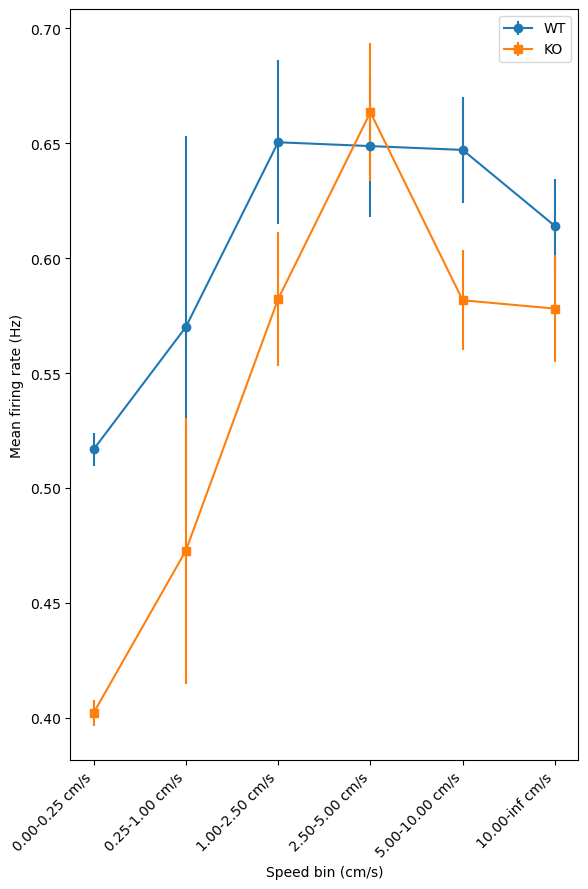

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# build your labels and x‐positions as before
labels = [f"{l:.2f}-{h:.2f} cm/s" for l, h in zip(bin_edges['low'], bin_edges['high'])]
x = np.arange(len(labels))

# 1) Create a taller figure (width, height) in inches
fig, ax = plt.subplots(figsize=(6, 9))   # e.g. 6" wide by 9" tall

# 2) Plot with errorbars
ax.errorbar(x, mean_firing_rate_wt, yerr=sem_firing_rate_wt, fmt='o-', label='WT')
ax.errorbar(x, mean_firing_rate_ko, yerr=sem_firing_rate_ko, fmt='s-', label='KO')

# 3) Formatting
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_xlabel('Speed bin (cm/s)')
ax.set_ylabel('Mean firing rate (Hz)')
ax.legend()
fig.tight_layout()

# 4) Save as PDF
fig.savefig('/Users/johnmarshall/Documents/Analysis/miniscope_analysis/miniscopeLinearTrack/mean_firing_rate_by_speed.pdf', format='pdf', bbox_inches='tight')
